In [1]:
import system_desing as sd
import system_optimization as so
import functions as fn
import data as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

ServerError: Can not connect to FXCM Server.

In [207]:
from datetime import datetime, timedelta
import string
from pandas.core.common import flatten

([1.6048226361278486], [5, 30, 0.045, -0.02])

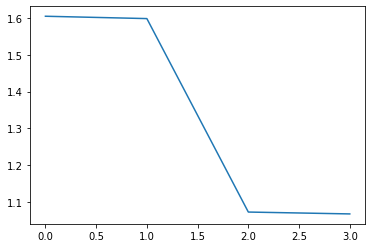

In [23]:
plt.plot(resultado)

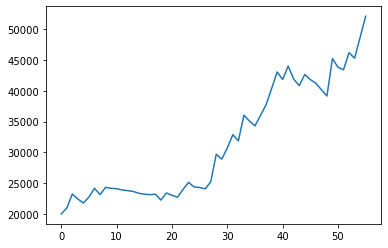

In [170]:


plt.plot(sd.flujo)

In [172]:
f_pip_size("btc/USD")

0.01

In [174]:
columnas_tiempos(lista = rend_operacion, operaciones=operaciones, \
                    take_profit = take_profit, stop_loss = stop_loss)

,Tiempo
# Operación,
0,0 days 12:00:00
1,1 days 08:00:00
2,0 days 04:00:00
3,3 days 16:00:00
4,0 days 16:00:00
5,3 days 20:00:00
6,4 days 00:00:00
7,1 days 04:00:00
8,0 days 12:00:00


In [176]:
f_columnas_pips(pips = f_pip_size("btc/USD"), rendimiento=rendimiento)

,Profit,Pips,Profit_acum,Pip_acum
0,0.048206,0.000482,0.048206,0.000482
1,0.108394,0.000602,0.156600,0.001084
2,-0.036040,-0.001444,0.120560,-0.000360
3,-0.027885,0.000082,0.092676,-0.000279
4,0.044851,0.000727,0.137527,0.000449
5,0.061909,0.000171,0.199436,0.000619
6,-0.042679,-0.001046,0.156756,-0.000427
7,0.051619,0.000943,0.208375,0.000516
8,-0.007006,-0.000586,0.201369,-0.000070
9,-0.002309,0.000047,0.199060,-0.000023


In [303]:
f_estadísticas_ba(rendimiento, operaciones, "df_2_ranking")

0.024933815002441406


,Medida,Valor,Descripción
0,Op_totales,55,Operaciones totales
1,Ganadoras,24,Operaciones ganadoras
2,Perdedoras,31,Operaciones perdedoras
3,Mediana (Profit),-0.004169,Mediana de profit de operaciones
4,Mediana (Pips),0.000047,Mediana de pips de operaciones
5,R. efectividad,0.436364,Ganadoras Totales/Operaciones Totales
6,R. proporción,0.774194,Ganadoras Totales/Perdedoras Totales


In [304]:
evolucion_capital = f_evolucion_capital(cierre, operaciones, rend_operacion, take_profit, stop_loss, capital, rendimiento)
evolucion_capital

,timestamp,Profit_d,Profit_acum_d
0,2018-06-24 00:00:00,0.0,20000
1,2018-06-25 00:00:00,0.0,20000.0
2,2018-06-26 00:00:00,0.0,20000.0
3,2018-06-27 00:00:00,0.0,20000.0
4,2018-06-28 00:00:00,0.0,20000.0
...,...,...,...
583,2020-01-28 00:00:00,0.0,52096.452723
584,2020-01-29 00:00:00,0.0,52096.452723
585,2020-01-30 00:00:00,0.0,52096.452723
586,2020-01-31 00:00:00,0.0,52096.452723


In [277]:
f_estadisticas_mad(evolucion_capital)

,0,1
0,Shape Ratio Original,-3.032006
1,Shape Ratio Actualizado,0
2,DrawDown,-0.049619
3,DrawUp,0.164335


0.01

In [42]:
metrica_optimizacion(range(1,51), range(1,51), np.arange(.025,.055,.005), np.arange(-.005,-.03,-.005))

0.029918670654296875


36750

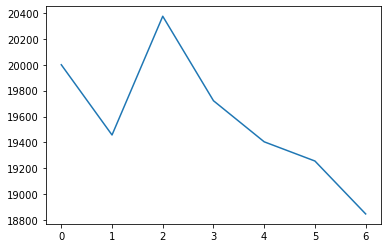

In [ ]:
cierre = sd.val_ohlc['close'] 
open = sd.val_ohlc['open'] 
comision = .001 
short_length = 5
long_length = 30
take_profit = .045 #ya en porcentaje
stop_loss = -.02 #ya en porcentaje

short_ema = ema(close = cierre, length = short_length)
long_ema = ema(close = cierre, length = long_length)

señales = signals(short_ema=short_ema, long_ema=long_ema, cierre=cierre)
señales_index = signal_index(lista = señales)
operaciones = operations(lista = señales_index, open=open)
rend_operacion = open_price_profit(lista = operaciones)
rendimiento = profit(lista = rend_operacion, comision = comision,\
                    take_profit = take_profit, stop_loss = stop_loss)
flujo = capital_flow(lista = rendimiento, capital = capital)

plt.plot(flujo)

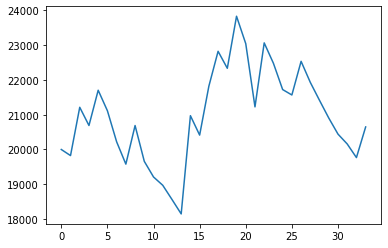

In [ ]:
cierre = sd.test_ohlc['close'] 
open = sd.test_ohlc['open'] 
comision = .001 
short_length = 5
long_length = 30
take_profit = .045 #ya en porcentaje
stop_loss = -.02 #ya en porcentaje

short_ema = ema(close = cierre, length = short_length)
long_ema = ema(close = cierre, length = long_length)

señales = signals(short_ema=short_ema, long_ema=long_ema, cierre=cierre)
señales_index = signal_index(lista = señales)
operaciones = operations(lista = señales_index, open=open)
rend_operacion = open_price_profit(lista = operaciones)
rendimiento = profit(lista = rend_operacion, comision = comision,\
                    take_profit = take_profit, stop_loss = stop_loss)
flujo = capital_flow(lista = rendimiento, capital = capital)

plt.plot(flujo)

In [ ]:
'2018-01-31 00:00:00', '2021-12-31 23:59:59'

In [293]:
data_ohlc = dt.fxcm_ohlc('BTC/USD', 'm1' , '2018-01-31 00:00:00', '2018-02-28 23:59:59')

OSError: Connection aborted, failed to reconnect

In [308]:
import functions as fn

In [312]:
train = sd.proceso_completo(cierre = sd.train_ohlc['close'],
open = sd.train_ohlc['open'], 
comision = .001, 
short_length = 5,
long_length = 30,
take_profit = .045,
stop_loss = -.02,
capital = 20000)

0.000997304916381836
0.0019881725311279297
0.0478823184967041
0.0009970664978027344
0.017951250076293945
0.20847702026367188
0.0
0.0


In [322]:
train[5]

[20000,
 20964.126984126982,
 23236.511293891293,
 22399.07165648608,
 21774.481691143945,
 22751.08567092593,
 24159.584064976763,
 23128.465501888608,
 24322.33789135141,
 24151.924196958797,
 24096.16224032298,
 23882.795528951774,
 23783.23077896701,
 23641.818826756124,
 23348.52279536004,
 23207.16074366123,
 23125.130253938547,
 23205.400223066856,
 22250.591164253514,
 23394.380167483017,
 23026.8367980384,
 22713.696120315206,
 23975.33896725959,
 25122.947840008306,
 24374.815077948686,
 24290.094769811774,
 24077.39982904769,
 25194.734833565843,
 29694.754258995432,
 28885.737559725032,
 30724.62002354762,
 32866.18248102501,
 31858.628574341084,
 36029.569096510255,
 35079.229309391165,
 34295.58507022073,
 36009.237963308384,
 37702.10436649417,
 40324.07409263504,
 43048.340901237476,
 41834.08989491631,
 44009.558701340015,
 41879.124293477216,
 40840.644669522015,
 42641.95945741027,
 41806.29487254937,
 41220.91274249752,
 40167.3998618003,
 39145.995743486324,
 45227